In [164]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm


import os
for dirname, _, filenames in os.walk('/kaggle/input'): #Importing the relevant csv files.
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Creating dataframes for train and test sets
traindf = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
testdf = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


**Starting with Question 2c.**

In [165]:
#Displaying the number of rows and columns in the train and test sets.
print("The train data size is : {} ".format(traindf.shape))
print("The test data size is: {} ".format(testdf.shape))

The train data size is : (1460, 81) 
The test data size is: (1459, 80) 


In [166]:
#Displaying first five rows of the train set
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [167]:
#Displaying first five rows of the test set
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**Since ID does not affect the sale price it can be safely removed, saved and added later in the end.**

In [168]:
#numerically showing the distribution of SalePrice
traindf['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice distribution')

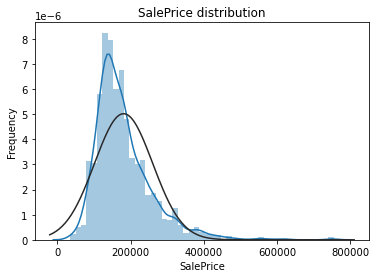

In [169]:
#graphically showing the distribution of SalePrice
sns.distplot(traindf['SalePrice'] , fit=norm);


plt.ylabel('Frequency')
plt.title('SalePrice distribution')

**The graph is right skewed.** 

**Train and Test data are merged into the same dataframe as both have different amounts of missing values. This needs to be rectified in both.**

In [170]:
#Saving the train and test data seperately before they are judged. 
trainsum = traindf.shape[0]
testsum = testdf.shape[0]

#Seperating sale price as the values in it are not including in train
y_train = traindf.SalePrice.values

#Merging train and test set into a single dataframe.
fulldataframe = pd.concat((traindf, testdf)).reset_index(drop=True)
fulldataframe.drop(['SalePrice'], axis=1, inplace=True)

print("Shape of entire Dataframe : {}".format(fulldataframe.shape))

Shape of entire Dataframe : (2919, 80)


In [171]:
#Finding the columns with missing values and showing the percentage of missing values
fulldataframe_null = (fulldataframe.isnull().sum() / len(fulldataframe)) * 100
fulldataframe_null = fulldataframe_null.drop(fulldataframe_null[fulldataframe_null == 0].index).sort_values(ascending=False)[:30]

#Only the first 30 can be displayed so displaying the first 30 columns with missing values
missing_data = pd.DataFrame({'Percentage of missing values' :fulldataframe_null})
missing_data.head(30)

,Percentage of missing values
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


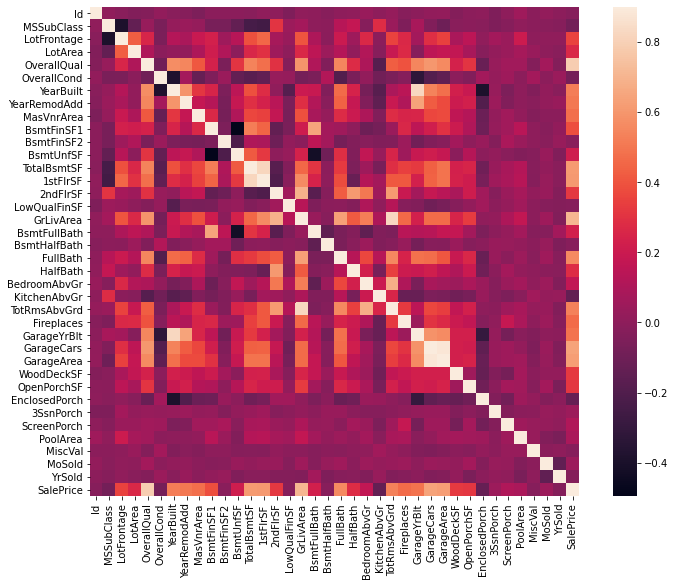

In [172]:
#using a heatmap to present the correlation matrix to see which variables are correlated to SalePrice the most
corrmat = traindf.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

**Question 2d - Feature scaling was not required so it was skipped.****

**Question 2a starts from here.**

In [173]:
#Imputing missing values with none                         
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType','MasVnrArea','MSSubClass'):
    fulldataframe[col] = fulldataframe[col].fillna('None')

fulldataframe["LotFrontage"] = fulldataframe.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

#Imputing missing values in 0 as having none means 0.
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    fulldataframe[col] = fulldataframe[col].fillna(0)

#These only have a few missing values so imputing the most common one should be enough    
fulldataframe['MSZoning'] = fulldataframe['MSZoning'].fillna(fulldataframe['MSZoning'].mode()[0])
fulldataframe['Electrical'] = fulldataframe['Electrical'].fillna(fulldataframe['Electrical'].mode()[0])
fulldataframe['KitchenQual'] = fulldataframe['KitchenQual'].fillna(fulldataframe['KitchenQual'].mode()[0])
fulldataframe['Exterior1st'] = fulldataframe['Exterior1st'].fillna(fulldataframe['Exterior1st'].mode()[0])
fulldataframe['Exterior2nd'] = fulldataframe['Exterior2nd'].fillna(fulldataframe['Exterior2nd'].mode()[0])
fulldataframe['SaleType'] = fulldataframe['SaleType'].fillna(fulldataframe['SaleType'].mode()[0])

#The following had many missing values and imputing them would give a false idea of the data.
fulldataframe = fulldataframe.drop(['Utilities'], axis=1)
fulldataframe = fulldataframe.drop(['PoolQC'], axis=1)
fulldataframe = fulldataframe.drop(['Alley'], axis=1)
fulldataframe = fulldataframe.drop(['FireplaceQu'], axis=1)
fulldataframe = fulldataframe.drop(['MiscFeature'], axis=1)
fulldataframe = fulldataframe.drop(['Fence'], axis=1)

#Data description says NA means typical
fulldataframe["Functional"] = fulldataframe["Functional"].fillna("Typ")

#Check remaining missing values if any 
total_test = fulldataframe.isnull().sum().sort_values(ascending=False)
percent_test = (fulldataframe.isnull().sum()/fulldataframe.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_test, percent_test], axis=1, keys=['Total', 'Percent'])
missing_data.head(35)

,Total,Percent
SaleCondition,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


**There are no more missing features.**

**Question 2b - Handling categorical data by creating dummy categorical features.**

In [174]:
#Creating dummy categorical features.
fulldataframe = pd.get_dummies(fulldataframe)

**Work for Question 1 starts from here.**

In [175]:
#Seperating the concatenated Dataset into train and test.
newtrain = fulldataframe[:trainsum]
newtest = fulldataframe[trainsum:]

#Splitting training set into train and validation sets.
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

X_train,X_test,Y_train,Y_test = train_test_split(newtrain,y_train,test_size = 0.2, random_state = 50)

**Question 1a**

In [176]:
from sklearn.linear_model import  Lasso

#Lasso Regularization
L1 = Lasso()
L1.fit(X_train,Y_train)
L1pred=L1.predict(X_test)
print("R2 score of Lasso Regularization = ", metrics.r2_score(Y_test,L1pred))

R2 score of Lasso Regularization =  0.8811403035683752


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118143038689.45287, tolerance: 730762301.4127969
  positive)


In [177]:
from sklearn.linear_model import Ridge

#Ridge regularization
L2 = Ridge()
L2.fit(X_train,Y_train)
L2pred=L2.predict(X_test)
print("R2 score of Ridge regularization = ", metrics.r2_score(Y_test,L2pred))

R2 score of Ridge regularization =  0.9039536540094891


**Question 1b with max_depth restrictions. As opposed to no restrictions, max_depth restrictions gave a higher r2 score.**

In [178]:
from sklearn.tree import DecisionTreeRegressor

#Decision Trees
DTR = DecisionTreeRegressor(max_depth = 50)
DTR.fit(X_train,Y_train)
DTRpred=DTR.predict(X_test)

print("R2 score of Decision Trees = ", metrics.r2_score(Y_test,DTRpred))

R2 score of Decision Trees =  0.8031237488614396


**Question 1c. Increasing number of trees from the default value of 100 to 120 increased the R2 score.**

In [179]:
from sklearn.ensemble import RandomForestRegressor

#Random Forest
RFR = RandomForestRegressor(n_estimators = 120)
RFR.fit(X_train,Y_train)
RFRpred=RFR.predict(X_test)

print("R2 score of Random Forest = ", metrics.r2_score(Y_test,RFRpred))


R2 score of Random Forest =  0.8934831352513353


**Question 1d**

In [180]:
from sklearn.ensemble import GradientBoostingRegressor

GradBoost = GradientBoostingRegressor(n_estimators=2800,learning_rate=0.05,max_depth=4,max_features='sqrt',min_samples_leaf=15,min_samples_split=10,loss='huber',random_state =10)
GradBoost.fit(X_train,Y_train)
GradBoostpred=GradBoost.predict(X_test)
print("R2 score of Gradient Boosting Regressor = ", metrics.r2_score(Y_test,GradBoostpred))

R2 score of Gradient Boosting Regressor =  0.9177655687610876


In [181]:
GradBoostprediction = GradBoost.predict(newtest)

Question 4

Ensemble learning is the process by which several models are created and joined together to solve a particular problem. Ensemble learning is mainly used to make the performance of a model better or reduce the possibility of choosing a poor one. 

Bagging and boosting are both ensemble methods to get N learners from 1 learner but, while they are built independently for Bagging, Boosting tries to add new models that do well where previous models fail. Both generate several training data sets by random sampling but only Boosting determines weights for the data to tip the scales in favor of the most difficult cases. Both make the final decision by averaging  the N learners (or taking the majority of them) but it is an equally weighted average for Bagging and a weighted average for Boosting, more weight to those with better performance on training data.

**Gradient Boosting Regressor had the highest R2 score for so it is being used for the kaggle submission.**

In [182]:
#Gradient Boosting Regressor had the highest R2 score for so it is being used for the kaggle submission.
submission = pd.DataFrame({'Id':newtest.Id,'SalePrice':GradBoostprediction})
submission.head()
submission.to_csv('submission.csv', index=False)

**After submission my position was 1915 and score 0.13044**

**Question 3**

In [183]:
#Import the standard scaler
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()
stdscaler.fit(X_train)
stdscaler.fit(X_test)

StandardScaler()

In [184]:
stdscaled_train = stdscaler.transform(X_train)
stdscaled_train.shape

(1168, 722)

In [185]:
stdscaled_test = stdscaler.transform(X_test)
stdscaled_test.shape

(292, 722)

In [186]:
from sklearn.decomposition import PCA
PCA = PCA(n_components=7)
PCA.fit(stdscaled_train)

PCA(n_components=7)

In [187]:
FittedPCA = PCA.transform(stdscaled_train)
FittedPCA.shape

(1168, 7)

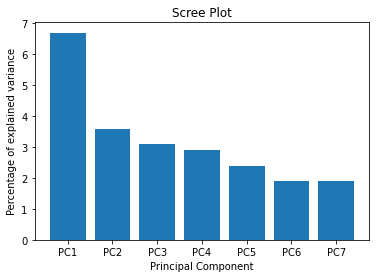

In [188]:
per_var = np.round(PCA.explained_variance_ratio_*100,decimals=1)
labels = ['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

Text(0, 0.5, 'Second Principal Component')

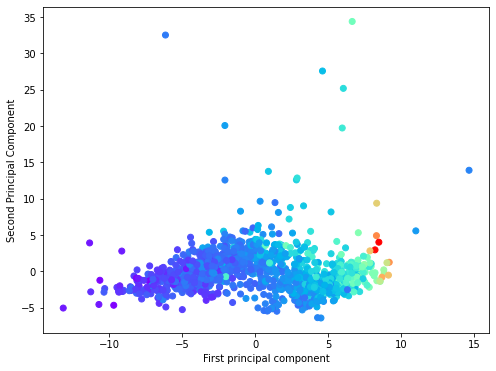

In [189]:
plt.figure(figsize=(8,6))
plt.scatter(FittedPCA[:,0],FittedPCA[:,1],c=Y_train,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

**Performing PCA and then applying decision tree algorithm**

In [190]:
DTRpca = DecisionTreeRegressor(max_depth = 50)
DTRpca.fit(FittedPCA,Y_train)
TestFittedPCA = PCA.transform(stdscaled_train)

y_pred = DTRpca.predict(TestFittedPCA)
print("R2 score of Decision Trees after performing PCA = ", metrics.r2_score(Y_test,y_pred))

AttributeError: 'numpy.ndarray' object has no attribute 'transform'